In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

In [1]:
# First we will Import Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
!pwd

/home/tukulkumar1011


In [5]:
data = pd.read_csv("/home/tukulkumar1011/marketing_campaign.csv", sep="\t")

In [6]:
#main_df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep='\t') 

# Data Cleaning

In [7]:
print("Number of datapoints:", len(data))

Number of datapoints: 2240


In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
#About the Dataset Content Discription/Attributes
#No. of data Points = 2240 and No. of feature = 29
#Person details
#•	ID: Customer's unique identifier
#•	Year_Birth: Customer's birth year
#•	Education: Customer's education level
#•	Marital_Status: Customer's marital status
#•	Income: Customer's yearly household income
#•	Kidhome: Number of children in customer's household
#•	Teenhome: Number of teenagers in customer's household
#•	Dt_Customer: Date of customer's enrollment with the company
#•	Recency: Number of days since customer's last purchase
#•	Complain: 1 if the customer complained in the last 2 years, 0 otherwise 

#Products
#•	MntWines: Amount spent on wine in last 2 years
#•	MntFruits: Amount spent on fruits in last 2 years
#•	MntMeatProducts: Amount spent on meat in last 2 years
#•	MntFishProducts: Amount spent on fish in last 2 years
#•	MntSweetProducts: Amount spent on sweets in last 2 years
#•	MntGoldProds: Amount spent on gold in last 2 years

#Promotion
#•	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#•	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#•	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#•	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#•	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#•	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#Place
#•	NumDealsPurchases: Number of purchases made with a discount
#•	NumWebPurchases: Number of purchases made through the company’s website
#•	NumCatalogPurchases: Number of purchases made using a catalogue
#•	NumStorePurchases: Number of purchases made directly in stores
#•	NumWebVisitsMonth: Number of visits to company’s website in the last month


In [10]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(data)

,Total,Percentage
Income,24,1.071429
Response,0,0.000000
MntSweetProducts,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


In [13]:
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


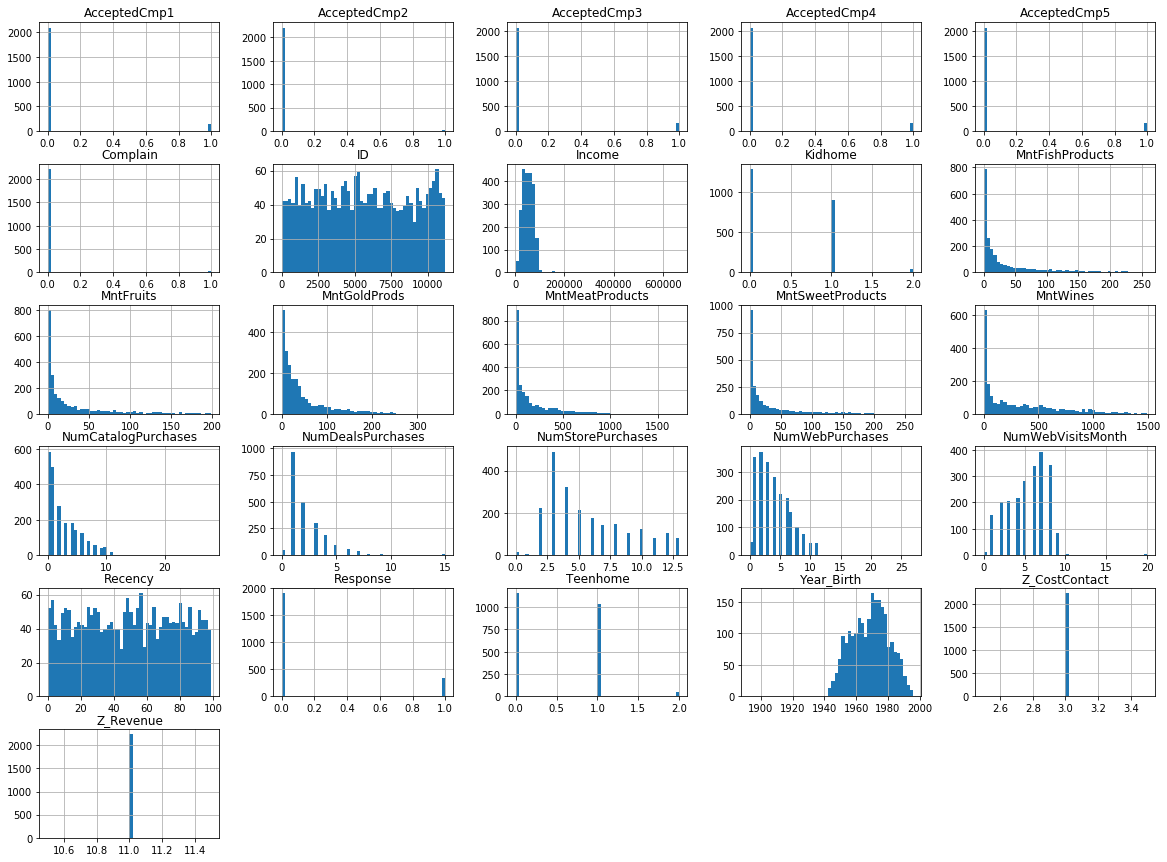

In [14]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [15]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

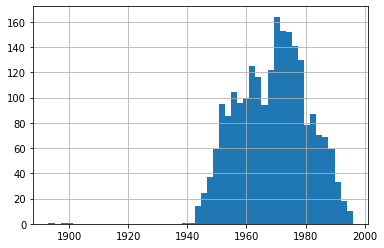

In [16]:
data["Year_Birth"].hist(bins=50)
plt.show()

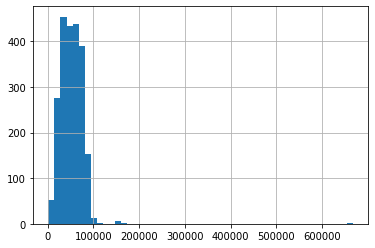

In [17]:
data["Income"].hist(bins=50)
plt.show()

In [18]:
data.corr()['Income']

ID                     0.013095
Year_Birth            -0.161791
Income                 1.000000
Kidhome               -0.428669
Teenhome               0.019133
Recency               -0.003970
MntWines               0.578650
MntFruits              0.430842
MntMeatProducts        0.584633
MntFishProducts        0.438871
MntSweetProducts       0.440744
MntGoldProds           0.325916
NumDealsPurchases     -0.083101
NumWebPurchases        0.387878
NumCatalogPurchases    0.589162
NumStorePurchases      0.529362
NumWebVisitsMonth     -0.553088
AcceptedCmp3          -0.016174
AcceptedCmp4           0.184400
AcceptedCmp5           0.335943
AcceptedCmp1           0.276820
AcceptedCmp2           0.087545
Complain              -0.027225
Z_CostContact               NaN
Z_Revenue                   NaN
Response               0.133047
Name: Income, dtype: float64

In [19]:
data["Income"] = data["Income"].fillna(data["Income"].median())

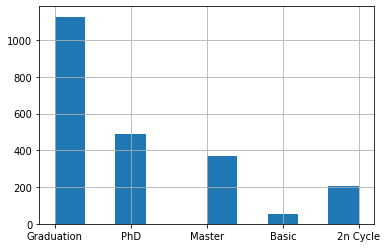

In [20]:
data['Education'].hist()

In [21]:
last_date = max(pd.to_datetime(data["Dt_Customer"]))
last_date

Timestamp('2014-12-06 00:00:00')

In [22]:
first_date = min(pd.to_datetime(data["Dt_Customer"]))
first_date

Timestamp('2012-01-08 00:00:00')

In [23]:
data['cust_seniority'] = last_date - pd.to_datetime(data["Dt_Customer"])

In [24]:
data['cust_seniority'] = data['cust_seniority'].dt.days

In [25]:
last_date - first_date

Timedelta('1063 days 00:00:00')

In [26]:
#lets calculate total expenditure by each customer
data['total_spend'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [27]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [28]:
#lets do segmentation Education qualification wise in 3 segments
data['Education'] = data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [29]:
data['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [30]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [31]:
#Deriving living status by marital status
data["Living_status"]=data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Single":"Single", "Divorced":"Single", "Widow":"Single", "Alone":"Single", "YOLO":"Single", "Absurd":"Single"})

In [32]:
data["Living_status"].value_counts()

Couple    1444
Single     796
Name: Living_status, dtype: int64

In [33]:
#Driving Family Size
data['Family_Size'] = data['Kidhome'] + data['Teenhome'] + data["Living_status"].replace({"Couple":2,"Single":1})
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [34]:
data['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

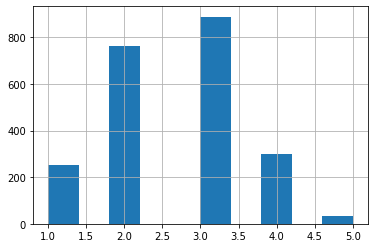

In [35]:
data['Family_Size'].hist()

In [91]:
data["Parent"] = np.where(data.Children> 0, 1, 0)

In [37]:
#For Clarity of Food items
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [39]:
# Defining total number of purchase by customer
data['No_purchase'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [40]:
data['No_purchase'].value_counts()

7     149
5     145
4     128
6     123
17    116
9     102
16    101
19    101
21     95
8      94
20     94
22     94
23     87
10     80
18     79
15     74
12     70
25     68
26     67
11     67
24     56
14     55
13     44
27     39
28     35
29     19
32     12
30     11
31     11
1       4
0       4
34      4
33      4
2       3
44      1
39      1
35      1
37      1
43      1
Name: No_purchase, dtype: int64

In [41]:
#Calculating no of campaign accepted
data['Camp_Accept'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [42]:
data['Camp_Accept'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Camp_Accept, dtype: int64

In [43]:
data['Camp_Accept'].nunique()

5

    #In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows. Also ID is a reduntant column
    #Thus they are not going to contribute anything in the model building. Hence we can drop them.

In [44]:
mod_data = data.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

In [45]:
mod_data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'cust_seniority', 'total_spend',
       'Living_status', 'Family_Size', 'Children', 'Parent', 'No_purchase',
       'Camp_Accept'],
      dtype='object')

In [46]:
import seaborn as sns

In [47]:
To_Plot = ['Education', 'Living_status', 'Income','cust_seniority','total_spend','Family_Size','No_purchase','Camp_Accept','Year_Birth']

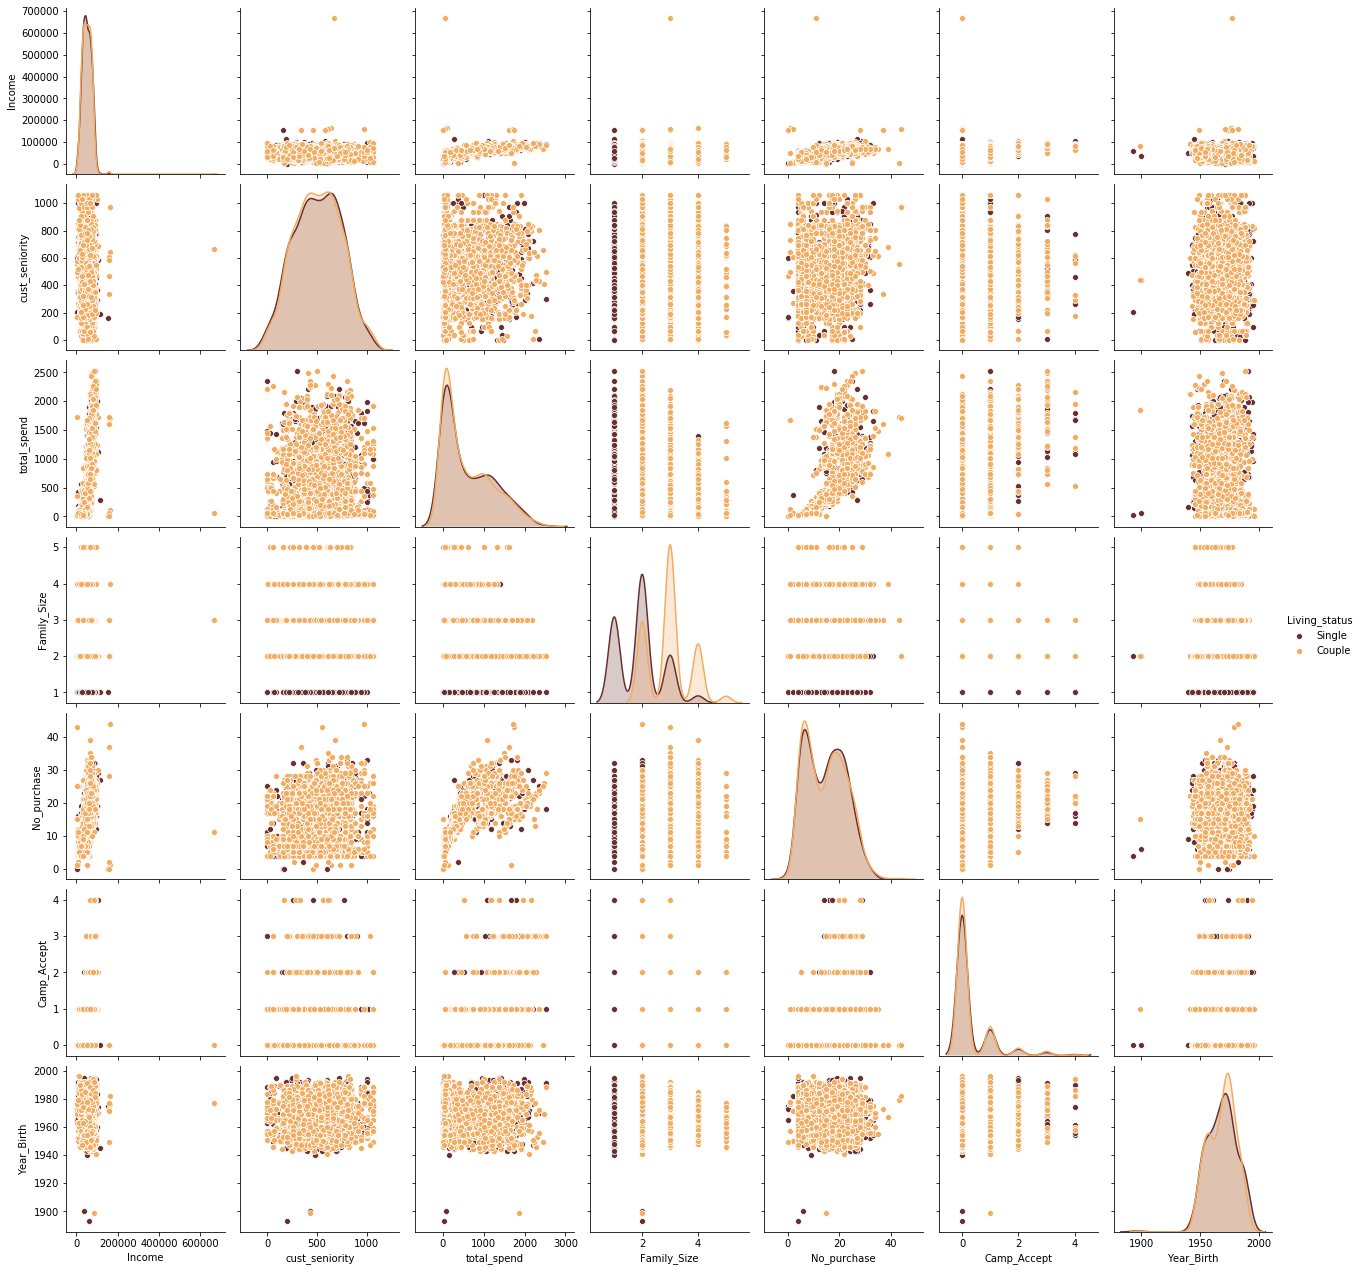

In [48]:
sns.pairplot(data=mod_data[To_Plot],hue="Living_status", palette= (["#682F2F","#F3AB60"]))
plt.show()

#Thus we can see that thier are few outliners with respect to Year of birth(or age) and income. we shall be removing the same.

In [49]:
mod_data = mod_data[mod_data['Income']<600000]
mod_data = mod_data[mod_data['Year_Birth']>1930]

In [50]:
mod_data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'cust_seniority', 'total_spend',
       'Living_status', 'Family_Size', 'Children', 'Parent', 'No_purchase',
       'Camp_Accept'],
      dtype='object')

In [51]:
mod_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,Complain,Response,cust_seniority,total_spend,Living_status,Family_Size,Children,Parent,No_purchase,Camp_Accept
0,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,1,971,1617,Single,1,0,0,25,0
1,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,125,27,Single,3,2,1,6,0
2,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,472,776,Couple,2,0,0,21,0
3,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,65,53,Couple,3,1,1,8,0
4,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,321,422,Couple,3,1,1,19,0


In [52]:
#Now we can delete the columns who's information are extracted
drop_col = ['Marital_Status','Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

In [53]:
mod_data = mod_data.drop(drop_col, axis=1)

In [54]:
mod_data.head()
temp_data = mod_data

In [55]:
temp_data.nunique()

Year_Birth               56
Education                 3
Income                 1971
Kidhome                   3
Teenhome                  3
Recency                 100
Wines                   775
Fruits                  158
Meat                    557
Fish                    182
Sweets                  177
Gold                    213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
cust_seniority          663
total_spend            1054
Living_status             2
Family_Size               5
Children                  4
Parent                    2
No_purchase              39
Camp_Accept               5
dtype: int64

# Data Preprocessing

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
Lab_encoder = LabelEncoder()

In [58]:
#cat_data = mod_data[['Education','Living_status']]
#num_data = mod_data.drop(columns=['Education','Living_status'], axis=1)

In [59]:
for i in ['Education','Living_status']:
    mod_data[i] = mod_data[[i]].apply(Lab_encoder.fit_transform)

In [60]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [61]:
data_prepared = std_scaler.fit_transform(mod_data)

In [62]:
processed_data = pd.DataFrame(data_prepared, columns=mod_data.columns)

In [63]:
processed_data.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumStorePurchases,NumWebVisitsMonth,cust_seniority,total_spend,Living_status,Family_Size,Children,Parent,No_purchase,Camp_Accept
0,-1.016868,-0.89438,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.552429,0.692865,1.975467,1.680176,1.347635,-1.758810,-1.264308,-1.584362,1.319340,-0.438933
1,-1.273264,-0.89438,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-1.167738,-0.131421,-1.667017,-0.962202,1.347635,0.445618,1.395139,0.631169,-1.155857,-0.438933
2,-0.333146,-0.89438,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,1.293496,-0.543564,-0.172996,0.282541,-0.742041,-0.656596,-1.264308,-1.584362,0.798246,-0.438933
3,1.290693,-0.89438,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.552429,0.280722,-1.925349,-0.918994,-0.742041,0.445618,0.065416,0.631169,-0.895310,-0.438933
4,1.034298,0.57070,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,0.062879,-0.131421,-0.823131,-0.305762,-0.742041,0.445618,0.065416,0.631169,0.537699,-0.438933


In [64]:
processed_data.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'cust_seniority',
       'total_spend', 'Living_status', 'Family_Size', 'Children', 'Parent',
       'No_purchase', 'Camp_Accept'],
      dtype='object')

In [65]:
final_data = processed_data[['Year_Birth', 'Education', 'Income', 'cust_seniority', 'total_spend', 'Living_status', 'Family_Size', 'No_purchase', 'Camp_Accept']]

In [66]:
final_data

,Year_Birth,Education,Income,cust_seniority,total_spend,Living_status,Family_Size,No_purchase,Camp_Accept
0,-1.016868,-0.89438,0.288947,1.975467,1.680176,1.347635,-1.758810,1.319340,-0.438933
1,-1.273264,-0.89438,-0.262003,-1.667017,-0.962202,1.347635,0.445618,-1.155857,-0.438933
2,-0.333146,-0.89438,0.918423,-0.172996,0.282541,-0.742041,-0.656596,0.798246,-0.438933
3,1.290693,-0.89438,-1.182183,-1.925349,-0.918994,-0.742041,0.445618,-0.895310,-0.438933
4,1.034298,0.57070,0.296187,-0.823131,-0.305762,-0.742041,0.445618,0.537699,-0.438933
...,...,...,...,...,...,...,...,...,...
2231,-0.162216,-0.89438,0.433060,0.124086,1.221499,-0.742041,0.445618,0.407425,-0.438933
2232,-1.956986,0.57070,0.563440,-1.942571,-0.269201,-0.742041,2.650045,0.928519,1.034721
2233,1.034298,-0.89438,0.234898,-0.848965,1.055312,1.347635,-1.758810,0.537699,1.034721
2234,-1.102333,0.57070,0.807803,-0.844659,0.393886,-0.742041,0.445618,1.058793,-0.438933


In [67]:
from sklearn.cluster import KMeans

In [68]:
X = []
for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(final_data)
    X.append(kmeans.inertia_)

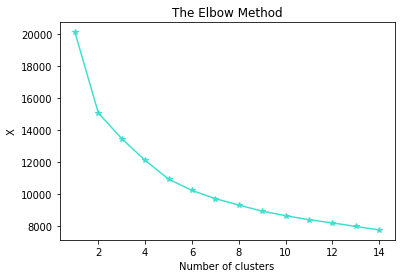

In [69]:
plt.plot(range(1, 15), X ,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('X')
plt.show()

In [70]:
## Quick examination of elbow method to find numbers of clusters to make.
#from yellowbrick.cluster import KElbowVisualizer
#print('Elbow Method to determine the number of clusters to be formed:')
#Elbow_M = KElbowVisualizer(KMeans(), k=10)
#Elbow_M.fit(PCA_ds)
#Elbow_M.show()

# DIMENSIONALITY REDUCTION

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=3)
pca.fit(processed_data)
PCA_ds = pd.DataFrame(pca.transform(processed_data), columns=(["col1","col2", "col3"]))#, "col4", "col5"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-2.033754e-16,2.993974,-5.610901,-2.725222,-0.760843,2.567328,8.084309
col2,2236.0,6.991029e-17,1.793546,-4.332239,-1.385379,-0.231345,1.312609,6.324816
col3,2236.0,5.561046e-18,1.233153,-3.643107,-0.850925,-0.025292,0.825845,6.761478


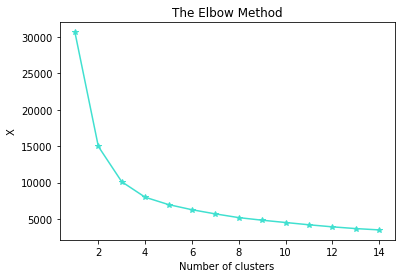

In [73]:
X = []
for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_ds)
    X.append(kmeans.inertia_)

plt.plot(range(1, 15), X ,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('X')
plt.show()

#The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [76]:
#Adding the Clusters feature to the orignal dataframe.
mod_data["Clusters"]= yhat_AC

In [77]:
mod_data.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,cust_seniority,total_spend,Living_status,Family_Size,Children,Parent,No_purchase,Camp_Accept,Clusters
0,1957,0,58138.0,0,0,58,635,88,546,172,...,7,971,1617,1,1,0,0,25,0,2
1,1954,0,46344.0,1,1,38,11,1,6,2,...,5,125,27,1,3,2,1,6,0,3
2,1965,0,71613.0,0,0,26,426,49,127,111,...,4,472,776,0,2,0,0,21,0,2
3,1984,0,26646.0,1,0,26,11,4,20,10,...,6,65,53,0,3,1,1,8,0,1
4,1981,1,58293.0,1,0,94,173,43,118,46,...,5,321,422,0,3,1,1,19,0,3


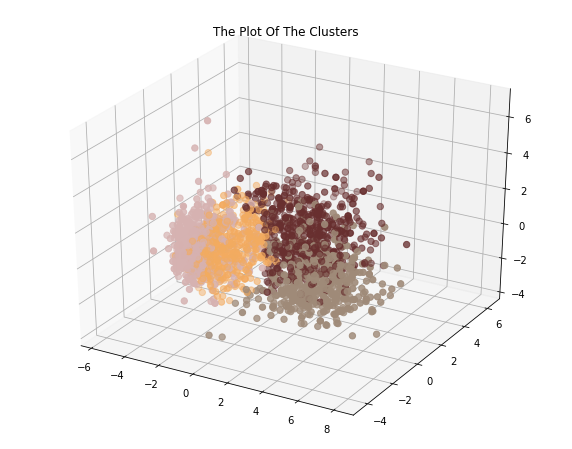

In [78]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import ListedColormap
#Plotting the clusters
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

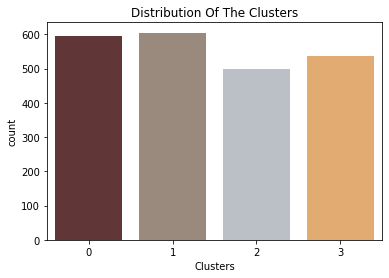

In [79]:
#Plotting countplot of clusters
pal = ["#682F2F", "#9F8A78","#B9C0C9","#F3AB60"]
pl = sns.countplot(x=mod_data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

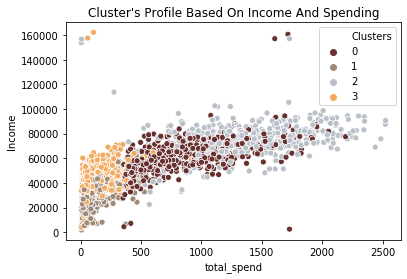

In [80]:
pl = sns.scatterplot(data = mod_data,x=mod_data["total_spend"], y=mod_data["Income"],hue=mod_data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Income vs spending plot shows the clusters pattern

•	group 0: high spending & average income

•	group 1: Low spending & average income

•	group 2: high spending & high income

•	group 3: low spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various promotions and deals accepted.

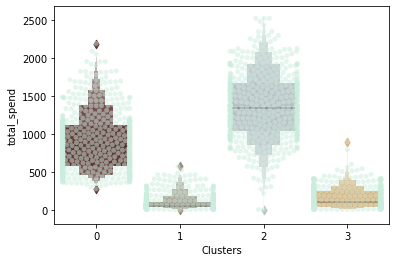

In [81]:
plt.figure()
pl=sns.swarmplot(x=mod_data["Clusters"], y=mod_data["total_spend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=mod_data["Clusters"], y=mod_data["total_spend"], palette=pal)
plt.show()

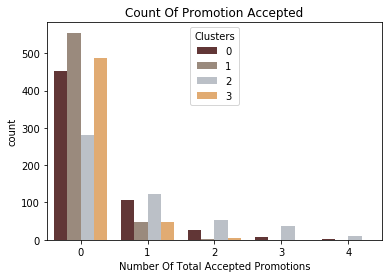

In [82]:
#Creating a feature to get a sum of accepted promotions 
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=mod_data["Camp_Accept"],hue=mod_data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

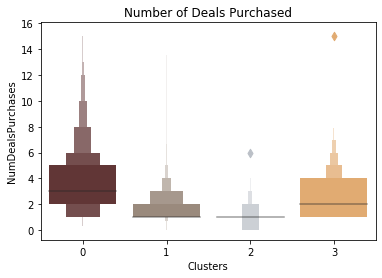

In [83]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=mod_data["NumDealsPurchases"],x=mod_data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

# PROFILING
Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions

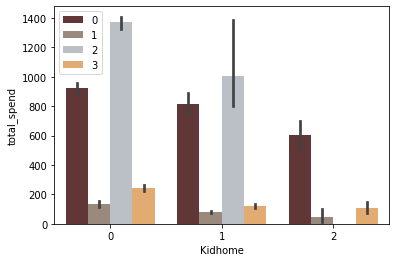

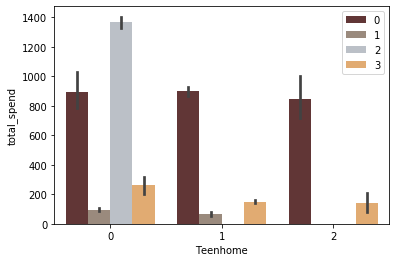

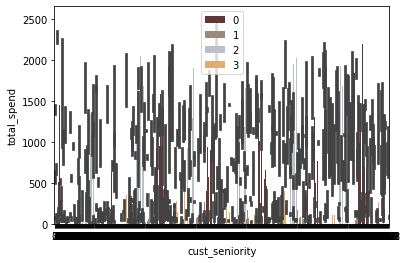

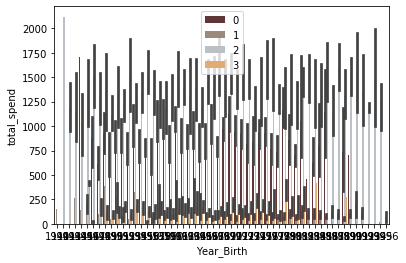

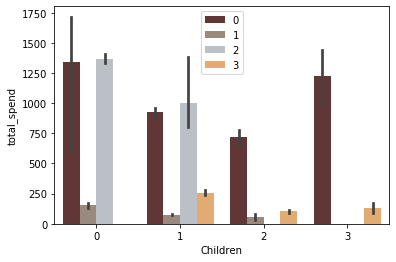

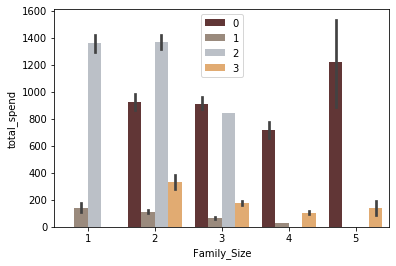

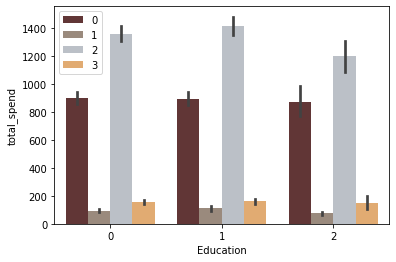

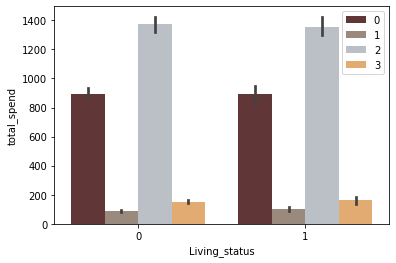

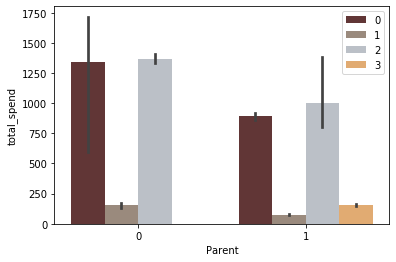

In [84]:
Personal = [ "Kidhome","Teenhome","cust_seniority", "Year_Birth", "Children", "Family_Size", "Education","Living_status", "Parent"]

for i in Personal:
    plt.figure()
    #sns.jointplot(data=mod_data, x=mod_data[i], y=mod_data["total_spend"], kind="kde", hue=mod_data["Clusters"], palette=pal)
    sns.barplot(data=mod_data, x=mod_data[i], y=mod_data["total_spend"], hue=mod_data["Clusters"], palette=pal)
    plt.legend()
    plt.show()

# Points to be noted:

The following information can be deduced about the customers in different clusters.

# CONCLUSION

#The following is our conclusion after performing unsupervised clustering. 
#•	Performed unsupervised clustering
#•	Did data analysis, add features & data cleaning
#•	Dimensionality reduction
#•	Performed clustering using kmeans & agglomerative ml algorithms
#•	Made 4 clusters and further profiling of customers
#•	Can be used in following:
    #•	Planning better marketing strategies
    #•	Planning better products & service customer segment wise
    #•	Cluster/ profile wise product/service consumption patern
    #•	Income and spending behaviour of customer

1    1599
0     637
Name: Parent, dtype: int64